In [1]:
import os
import pandas as pd # some array operation
import tensorflow
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, InputLayer, Dropout, Conv2D, Activation, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle # Load saved data
import numpy as np # Manipulating with array
import cv2 # image operation

Using TensorFlow backend.


In [9]:
model = load_model("ACbyHFI_model9_beta2.h5")

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 25)      700       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 25)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 50)        11300     
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 75)       

In [4]:
# Define data dir path
Train_data_dir = "/Users/york/Tensor1/JupyterNotebook/Ages Classification by Human face image p1/data"
Test_data_dir = "/Users/york/Tensor1/JupyterNotebook/Ages Classification by Human face image p1/data"

# Import csv files
train = pd.read_csv(os.path.join(Train_data_dir, "train_c.csv"))
test = pd.read_csv(os.path.join(Test_data_dir, "test.csv"))

# Import saved data
pickle_in = open(os.path.join(Train_data_dir, "X_train_128x3_c.pickle"),"rb")
train_x = pickle.load(pickle_in)

# Import saved data
pickle_in = open(os.path.join(Train_data_dir, "X_test_128x3_c.pickle"),"rb")
test_x = pickle.load(pickle_in)


# Split off the validation data
train_x, valid_x, train_y0, valid_y0 = train_test_split(train_x, train, test_size=0.15, random_state=37)

# Hien thi ty le phan chia cua tap du lieu kiem tra
print(valid_y0.Class.value_counts(normalize=True))

# Change lable to number
lb = LabelEncoder()
train_y = lb.fit_transform(train_y0.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

valid_y = lb.fit_transform(valid_y0.Class)
valid_y = keras.utils.np_utils.to_categorical(valid_y)


# lb = LabelEncoder()
# test_y = lb.fit_transform(test.Class)
# test_y = keras.utils.np_utils.to_categorical(test_y)

# print(train_x.shape)
# print(train_y.shape)
print("Train class saperate rate: ")
train.Class.value_counts(normalize=True)

MIDDLE    0.536266
YOUNG     0.338146
OLD       0.125588
Name: Class, dtype: float64
Train class saperate rate: 


MIDDLE    0.542519
YOUNG     0.337431
OLD       0.120050
Name: Class, dtype: float64

In [5]:
print("Train class saperate rate: ")
valid_y0.Class.value_counts(normalize=True)


Train class saperate rate: 


MIDDLE    0.536266
YOUNG     0.338146
OLD       0.125588
Name: Class, dtype: float64

In [6]:
from keras.preprocessing.image import ImageDataGenerator

data_aug = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 45,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)
data_aug.fit(train_x)

In [7]:
# Define number of parameter that we going to use in our nn model
img_size = 128
chanel_num = 3
class_num = 3

epoch_num = 4
batch_size = 64



# Define weights
weights = {
    0:0.19,
    1:0.55,
    2:0.26
}

In [11]:
# Configure the learning process
from keras.optimizers import Adam
opt1 = Adam(lr=0.0001)

# Compile model
model.compile(loss='categorical_crossentropy',
             optimizer= 'adam',
             metrics=['accuracy'])

# Train the model
history = model.fit_generator(data_aug.flow(train_x, train_y, batch_size = batch_size),
                    steps_per_epoch = len(train_x) / 16,
                    epochs = 30,
                    validation_data=(valid_x,valid_y),
                    verbose = 1,
                    class_weight = weights)

Epoch 1/30
1055/1054 [==============================] - 2285s 2s/step - loss: 0.0900 - accuracy: 0.8551 - val_loss: 0.3986 - val_accuracy: 0.8486
Epoch 2/30
1055/1054 [==============================] - 2278s 2s/step - loss: 0.0882 - accuracy: 0.8577 - val_loss: 0.3934 - val_accuracy: 0.8543
Epoch 3/30
1055/1054 [==============================] - 2273s 2s/step - loss: 0.0891 - accuracy: 0.8552 - val_loss: 0.4007 - val_accuracy: 0.8452
Epoch 4/30
1055/1054 [==============================] - 2275s 2s/step - loss: 0.0894 - accuracy: 0.8573 - val_loss: 0.3868 - val_accuracy: 0.8580
Epoch 5/30
1055/1054 [==============================] - 2276s 2s/step - loss: 0.0887 - accuracy: 0.8586 - val_loss: 0.3986 - val_accuracy: 0.8539
Epoch 6/30
1055/1054 [==============================] - 2277s 2s/step - loss: 0.0884 - accuracy: 0.8590 - val_loss: 0.3981 - val_accuracy: 0.8546
Epoch 7/30
1055/1054 [==============================] - 2274s 2s/step - loss: 0.0887 - accuracy: 0.8586 - val_loss: 0.4270 -

In [12]:
Score = model.evaluate(valid_x, valid_y, verbose=0)
print("Accuracy: %.4f%%" % (Score[1]*100))

Accuracy: 84.2512%


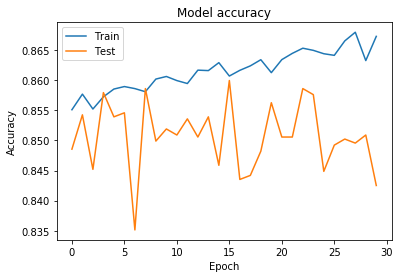

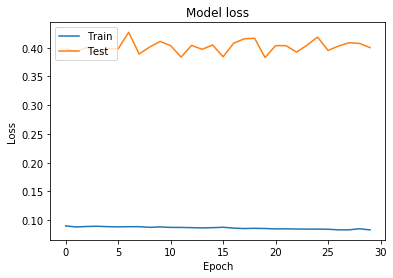

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
# Generate the confusion matrics for train data
train_pred = model.predict_classes(train_x)
train_pred = lb.inverse_transform(train_pred)

pd.crosstab(
    pd.Series(train_y0.Class, name='Actual'),
    pd.Series(train_pred, name = 'Prediction'),
    margins = True)

Prediction,MIDDLE,OLD,YOUNG,All
Actual,,,,
MIDDLE,3978,1029,2776,7783
OLD,889,227,606,1722
YOUNG,2467,643,1702,4812
All,7334,1899,5084,14317


In [15]:
# Generate the confusion matrics
valid_pred = model.predict_classes(valid_x)
valid_pred = lb.inverse_transform(valid_pred)

pd.crosstab(
    pd.Series(valid_y0.Class, name='Actual'),
    pd.Series(valid_pred, name = 'Prediction'),
    margins = True)

Prediction,MIDDLE,OLD,YOUNG,All
Actual,,,,
MIDDLE,111,31,86,228
OLD,26,6,25,57
YOUNG,84,22,58,164
All,221,59,169,449


In [16]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
valid_pred = model.predict_classes(valid_x)
valid_pred = lb.inverse_transform(valid_pred)

results = confusion_matrix(valid_y0.Class, valid_pred) 
 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(valid_y0.Class, valid_pred)) 
print('Report : ')
print(classification_report(valid_y0.Class, valid_pred))

Confusion Matrix :
[[1326   96  175]
 [  52  300   22]
 [ 110   14  883]]
Accuracy Score : 0.8425117528542646
Report : 
              precision    recall  f1-score   support

      MIDDLE       0.89      0.83      0.86      1597
         OLD       0.73      0.80      0.77       374
       YOUNG       0.82      0.88      0.85      1007

    accuracy                           0.84      2978
   macro avg       0.81      0.84      0.82      2978
weighted avg       0.85      0.84      0.84      2978



In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# data_aug1 = ImageDataGenerator(
#     featurewise_center = False,
#     samplewise_center = False,
#     featurewise_std_normalization = False,
#     samplewise_std_normalization = False,
#     zca_whitening = False,
#     rotation_range = 45,
#     width_shift_range = 0.1,
#     height_shift_range = 0.1,
#     horizontal_flip = True,
#     vertical_flip = False
# )

# data_aug1.fit(valid_x)

In [ ]:
# num_predictions = 36

# predict_gen = model.predict_generator(data_aug1.flow(valid_x, valid_y,
#     batch_size=64, shuffle=False),
#     steps=(valid_x.shape[0] // 64)+1, workers=4)

# indices = [np.random.choice(range(len(valid_x))) 
#            for i in range(num_predictions)]

# cifar_grid(valid_x,valid_y,indices,6,valid_y0,predictions=predict_gen)


In [17]:
# Save the trained model
model.save("ACbyHFI_model9_beta2.h5")

# Predict with the test data set and save to csv
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('Testing_Model9-2.csv', index=False)